# Feature Detection using BRUTE FORCE BY ORB

In [121]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
def display(img,cmap = "gray"):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap = 'gray')


In [123]:
reeses = cv2.imread("Computer-Vision-with-Python/DATA/reeses_puffs.png",0)

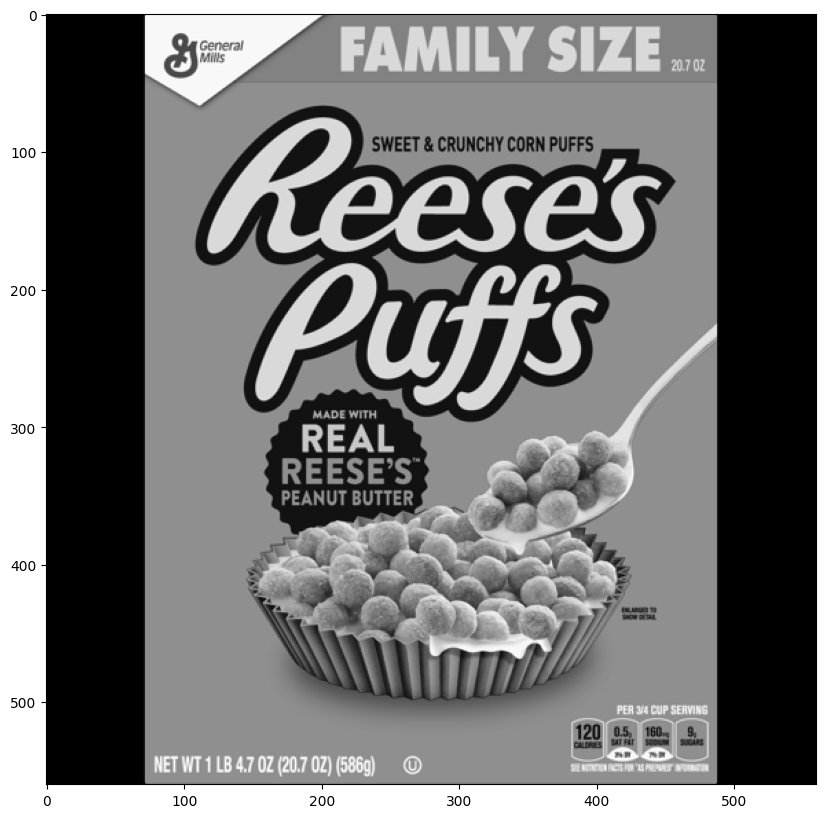

In [124]:
display(reeses)

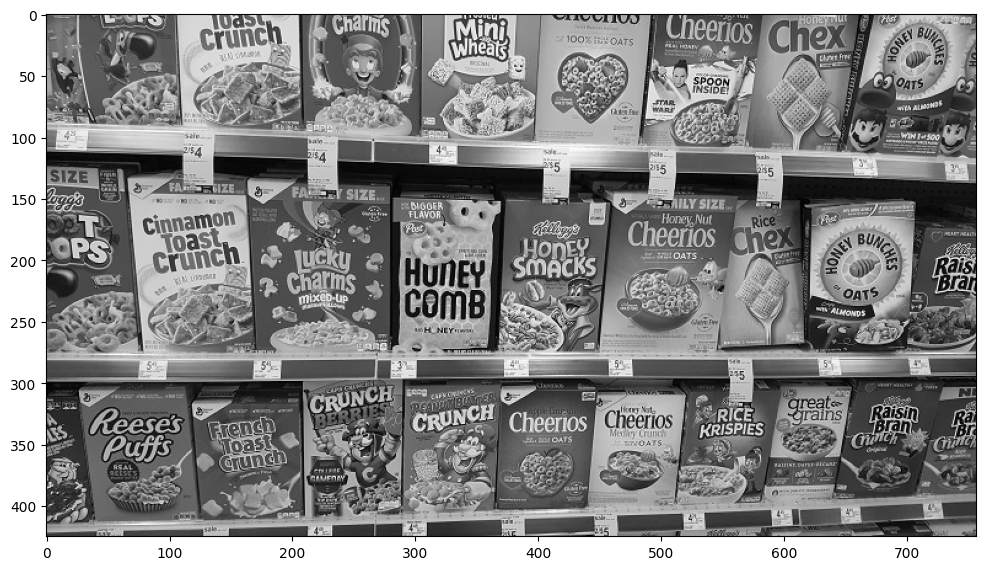

In [125]:
cereals = cv2.imread("Computer-Vision-with-Python\DATA\many_cereals.jpg",0)
display(cereals)

In [126]:
orb = cv2.ORB_create()  #This creates an ORB Object

In [127]:
# These lines detect the features and compute them and return KeyPoints and Descriptors as a tuple

kp1, dsc1 = orb.detectAndCompute(reeses,None)        
kp2, dsc2 = orb.detectAndCompute(cereals,None)

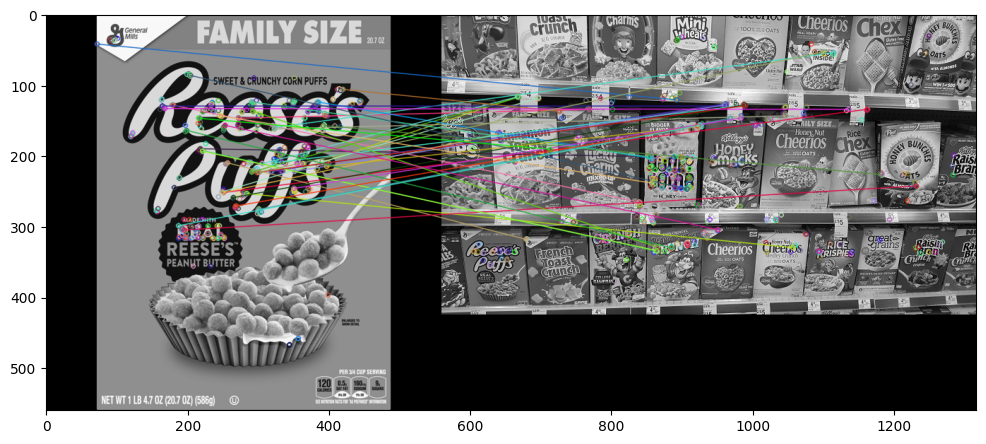

In [128]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck= True)       # Creating a BFMatcher object
matches = bf.match(dsc1,dsc2)                               # Matching the descriptors of both the objects
matches = sorted(matches, key = lambda x:x.distance)        # Sorting the sequence of matches. 

img3 = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:40],None) # Drawing the matches (Slicing of matches parameters can be done too)
display(img3)




# Feature Detection using BRUTE FORCE BY SIFT

In [129]:
sift = cv2.SIFT_create()


In [130]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [131]:
bf = cv2.BFMatcher()

In [132]:
matches = bf.knnMatch(des1,des2, k= 2)

In [133]:
matches

((< cv2.DMatch 0000024D32DBF1D0>, < cv2.DMatch 0000024D4759B5D0>),
 (< cv2.DMatch 0000024D47598910>, < cv2.DMatch 0000024D4750FAF0>),
 (< cv2.DMatch 0000024D32D92210>, < cv2.DMatch 0000024D32D91F70>),
 (< cv2.DMatch 0000024D32D92F10>, < cv2.DMatch 0000024D32D90770>),
 (< cv2.DMatch 0000024D32D923D0>, < cv2.DMatch 0000024D32D90A30>),
 (< cv2.DMatch 0000024D32D92F30>, < cv2.DMatch 0000024D32D93230>),
 (< cv2.DMatch 0000024D32D921B0>, < cv2.DMatch 0000024D32D923B0>),
 (< cv2.DMatch 0000024D32D91BF0>, < cv2.DMatch 0000024D32D92BF0>),
 (< cv2.DMatch 0000024D32D929D0>, < cv2.DMatch 0000024D32D908B0>),
 (< cv2.DMatch 0000024D32D92A10>, < cv2.DMatch 0000024D32D92F50>),
 (< cv2.DMatch 0000024D32D934B0>, < cv2.DMatch 0000024D32D93490>),
 (< cv2.DMatch 0000024D32D93530>, < cv2.DMatch 0000024D32D93170>),
 (< cv2.DMatch 0000024D32D934D0>, < cv2.DMatch 0000024D32D93550>),
 (< cv2.DMatch 0000024D32D91B70>, < cv2.DMatch 0000024D32D93570>),
 (< cv2.DMatch 0000024D32D931B0>, < cv2.DMatch 0000024D32D934F

In [134]:
good_matches = []

In [135]:
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good_matches.append(match1)

In [136]:
good_matches

[< cv2.DMatch 0000024D32DBF1D0>,
 < cv2.DMatch 0000024D32D93E30>,
 < cv2.DMatch 0000024D45C94430>,
 < cv2.DMatch 0000024D45C94470>,
 < cv2.DMatch 0000024D45C94670>,
 < cv2.DMatch 0000024D45C94C70>,
 < cv2.DMatch 0000024D45C94F70>,
 < cv2.DMatch 0000024D45C950F0>,
 < cv2.DMatch 0000024D45C95470>,
 < cv2.DMatch 0000024D45C956B0>,
 < cv2.DMatch 0000024D45C95A70>,
 < cv2.DMatch 0000024D45C95B70>,
 < cv2.DMatch 0000024D45C96DF0>,
 < cv2.DMatch 0000024D45C96E30>,
 < cv2.DMatch 0000024D45C96F30>,
 < cv2.DMatch 0000024D45C97CB0>,
 < cv2.DMatch 0000024D45C8C670>,
 < cv2.DMatch 0000024D45C8C730>,
 < cv2.DMatch 0000024D45C8C7F0>,
 < cv2.DMatch 0000024D45C8D070>,
 < cv2.DMatch 0000024D45C8D1B0>,
 < cv2.DMatch 0000024D45C8E2B0>,
 < cv2.DMatch 0000024D45C8E3F0>,
 < cv2.DMatch 0000024D45C8E430>,
 < cv2.DMatch 0000024D45C8E5F0>,
 < cv2.DMatch 0000024D45C8E630>,
 < cv2.DMatch 0000024D45C8F830>,
 < cv2.DMatch 0000024D45C8F9B0>,
 < cv2.DMatch 0000024D45C8F9F0>,
 < cv2.DMatch 0000024D45C8FFB0>,
 < cv2.DMa

In [137]:
print("Count of all the brute force matches are: {}".format(len(matches)))
print("Count of all good matches among the brute force matches are: {}".format(len(good_matches)))

Count of all the brute force matches are: 1501
Count of all good matches among the brute force matches are: 79


In [138]:
#  Let's draw the images and the matches

res = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,[good_matches],None,flags=2)

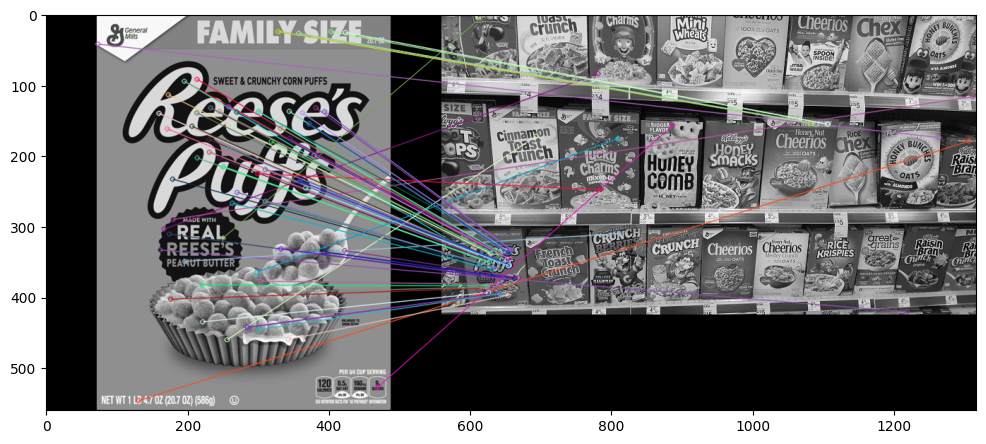

In [139]:
display(res)

# Feature Detection using FLANN

FLANN means Fast Library for Aproximate Nearest Neighbours

Comparitiveley faster than Brute Force Matches
Does not gaurantee best possible matches but gives just general good matches

In [140]:
sift = cv2.SIFT_create()

In [141]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [142]:
FLANN_INDEX_KTREE = 0
index_param = dict(algorithm = FLANN_INDEX_KTREE, trees = 5)
search_param = dict(checks = 50)

In [143]:
flann = cv2.FlannBasedMatcher(index_param,search_param)

In [144]:
matches = flann.knnMatch(des1,des2,k = 2)

In [145]:
good_matches = []

In [146]:
matches

((< cv2.DMatch 0000024D45C53650>, < cv2.DMatch 0000024D45C50170>),
 (< cv2.DMatch 0000024D32D918F0>, < cv2.DMatch 0000024D32D91AB0>),
 (< cv2.DMatch 0000024D32D912D0>, < cv2.DMatch 0000024D32D91B50>),
 (< cv2.DMatch 0000024D32D91550>, < cv2.DMatch 0000024D32D910F0>),
 (< cv2.DMatch 0000024D32D90E90>, < cv2.DMatch 0000024D475B75D0>),
 (< cv2.DMatch 0000024D475B7770>, < cv2.DMatch 0000024D475B7A70>),
 (< cv2.DMatch 0000024D475B71B0>, < cv2.DMatch 0000024D475B7B50>),
 (< cv2.DMatch 0000024D475B7170>, < cv2.DMatch 0000024D475B70B0>),
 (< cv2.DMatch 0000024D475B5BF0>, < cv2.DMatch 0000024D475B6F70>),
 (< cv2.DMatch 0000024D475B78B0>, < cv2.DMatch 0000024D475B7C50>),
 (< cv2.DMatch 0000024D475B5970>, < cv2.DMatch 0000024D475B72F0>),
 (< cv2.DMatch 0000024D475B7C90>, < cv2.DMatch 0000024D475B7C70>),
 (< cv2.DMatch 0000024D475B7330>, < cv2.DMatch 0000024D475B7CD0>),
 (< cv2.DMatch 0000024D475B7D30>, < cv2.DMatch 0000024D475B7CF0>),
 (< cv2.DMatch 0000024D475B7A50>, < cv2.DMatch 0000024D475B73D

In [147]:
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good_matches.append(match1)

In [148]:
good_matches

[< cv2.DMatch 0000024D45C53650>,
 < cv2.DMatch 0000024D45CD6EF0>,
 < cv2.DMatch 0000024D45CD74B0>,
 < cv2.DMatch 0000024D45CD74F0>,
 < cv2.DMatch 0000024D45CD76F0>,
 < cv2.DMatch 0000024D45CD7CF0>,
 < cv2.DMatch 0000024D32E1C030>,
 < cv2.DMatch 0000024D32E1C1B0>,
 < cv2.DMatch 0000024D32E1C530>,
 < cv2.DMatch 0000024D32E1C770>,
 < cv2.DMatch 0000024D32E1CB30>,
 < cv2.DMatch 0000024D32E1CC30>,
 < cv2.DMatch 0000024D32E1DEB0>,
 < cv2.DMatch 0000024D32E1DEF0>,
 < cv2.DMatch 0000024D32E1DFF0>,
 < cv2.DMatch 0000024D32E1ED70>,
 < cv2.DMatch 0000024D32E1F6F0>,
 < cv2.DMatch 0000024D32E1F7B0>,
 < cv2.DMatch 0000024D32E1F870>,
 < cv2.DMatch 0000024D32E6C130>,
 < cv2.DMatch 0000024D32E6C270>,
 < cv2.DMatch 0000024D32E6D370>,
 < cv2.DMatch 0000024D32E6D4B0>,
 < cv2.DMatch 0000024D32E6D4F0>,
 < cv2.DMatch 0000024D32E6D6B0>,
 < cv2.DMatch 0000024D32E6D6F0>,
 < cv2.DMatch 0000024D32E6E8F0>,
 < cv2.DMatch 0000024D32E6EA70>,
 < cv2.DMatch 0000024D32E6EAB0>,
 < cv2.DMatch 0000024D32E6F070>,
 < cv2.DMa

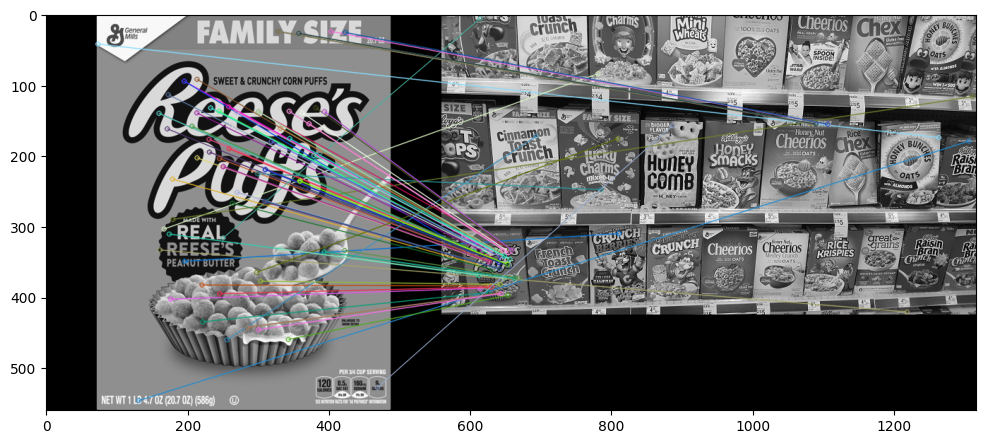

In [155]:
res = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,[good_matches],None,flags=2)
display(res)

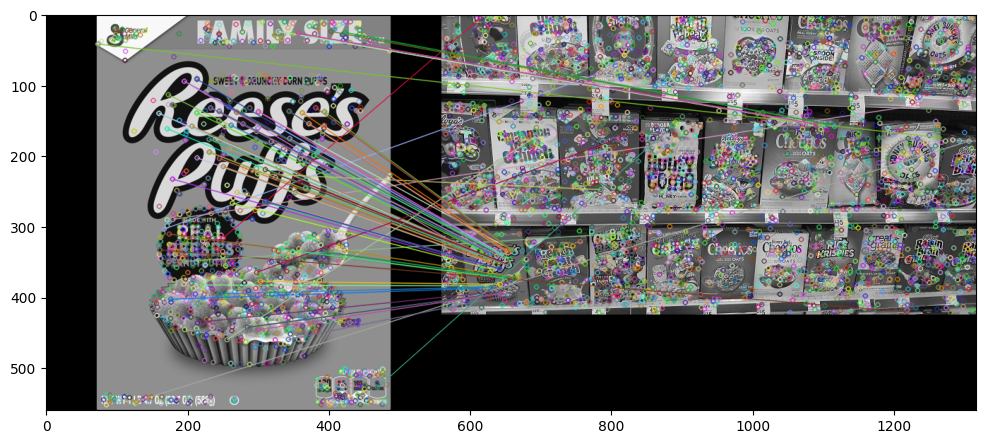

In [153]:
res = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,[good_matches],None,flags=0)
display(res)